# Agglomerative hierarchal clustering




In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#loading df
file = 'C:/Users/{kr.pA}/Downloads/methylated data/modified.csv'
df = pd.read_csv(file, sep = ',')

#editing df to desired format
df = df.transpose()

#log transform
a = df.iloc[0:1]

b = df.iloc[1:]
b = b.astype(float)
b = b.transform(np.log)

df = pd.concat([a, b])

#inserting patient numbers
df.insert(416349, 416349, ['Patient Number','Patient 3 rep 1', 'Patient 3 rep 1','Patient 3 rep 1','Patient 3 rep 1','Patient 9','Patient 9','Patient 9','Patient 9','Patient 10','Patient 10',
             'Patient 11','Patient 11','Patient 11','Patient 11','Patient 12 rep 1','Patient 12 rep 1','Patient 14','Patient 14','Patient 14 rep 1','Patient 14 rep 1',
             'Patient 1','Patient 1','Patient 1','Patient 1','Patient 2','Patient 2','Patient 2','Patient 2','Patient 3','Patient 3',
             'Patient 3', 'Patient 3','Patient 4', 'Patient 4','Patient 4', 'Patient 4','Patient 7','Patient 7','Patient 7','Patient 7',
             'Patient 8','Patient 8','Patient 8','Patient 8','Patient 9','Patient 9','Patient 10','Patient 10','Patient 12','Patient 12',
             'Patient 14','Patient 14','Patient 15','Patient 15','Patient 15','Patient 15','Patient 16','Patient 16','Patient 16','Patient 16',
             'Patient 18','Patient 18','Patient 18','Patient 18','Patient 19','Patient 19','Patient 19','Patient 19','Patient 20','Patient 20',
             'Patient 20','Patient 20','Patient 21','Patient 21','Patient 21','Patient 21','Patient 22','Patient 22','Patient 22','Patient 22',
             'Patient 26','Patient 26','Patient 26','Patient 26','Patient 28','Patient 28','Patient 28','Patient 28','Patient 29','Patient 29',
             'Patient 29','Patient 29','Patient 29 rep 2','Patient 29 rep 2'], True) 

#populating a list of the genes and the patient number heading to rename the columns and initialize features list
genelist = list(df.iloc[0,0:])

features = genelist[:-1]
df.columns = genelist

print(genelist)

df = df.drop(['ID_REF'], axis = 0)


#***SEPARATING PRIMARY VS RECURRENT***

missing = df.iloc[10:16]

#recur1 = unmeth
#recur2 = meth
#prim1 = unmeth
#prim2 = meth

recurmissing = missing.iloc[2:]

#recurrent

recur1 = df.iloc[3::4]
recur1 = recur1.drop("Patient 11_primary tumour Unmethylated signal")

recur1 = pd.concat([recur1, recurmissing.iloc[1::2]])

recur2 = df.iloc[2::4]
recur2 = recur2.drop("Patient 11_primary tumour Methylated signal")


s = df.iloc[-1:]
recur1 = pd.concat([recur1, s])

xs = df.iloc[-2:-1]
recur2= pd.concat([recur2, xs])
recur2= pd.concat([recur2, recurmissing.iloc[::2]])


#primary

prim1 = df.iloc[1::4]
prim1 = prim1.drop("Patient 11_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 12_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 29_recurrent tumour_2 Unmethylated signal")

prim1 = pd.concat([prim1, missing.iloc[1:2]])

prim2 = df.iloc[::4]
prim2 = prim2.drop("Patient 11_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 12_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 29_recurrent tumour_2 Methylated signal")

prim2= pd.concat([prim2,missing.iloc[0:1]])

#final indexed dataframes for the primary and recurrent data (separated by meth and unmeth within)

primary = pd.concat([prim1,prim2])   
primary = primary.drop(["Patient Number"], axis = 1)
recurrent = pd.concat([recur1, recur2])
recurrent = recurrent.drop(["Patient Number"], axis = 1)
meth = df.iloc[::2]
meth = meth.drop(["Patient Number"], axis = 1)
unmeth = df.iloc[1::2]
unmeth = unmeth.drop(["Patient Number"], axis = 1)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



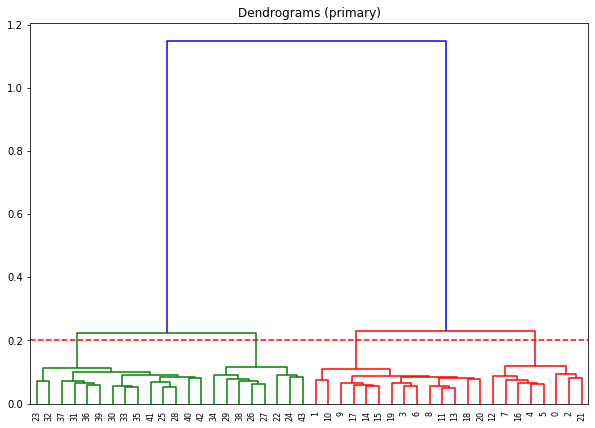

In [87]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

primary_scaled = normalize(primary)
primary_scaled = pd.DataFrame(primary_scaled, columns = primary.columns) #index = primary.index
primary_scaled 

#create dendrogram
#x-axis contains the samples and y-axis represents the distance between these samples

#threshold of 0.2 because that's where we want to cut the dendrogram (number of clusters)
#blue line has max vertical distance

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms (primary)")  
dend = shc.dendrogram(shc.linkage(primary_scaled, method='ward'))
plt.axhline(y=0.2, color='r', linestyle='--')

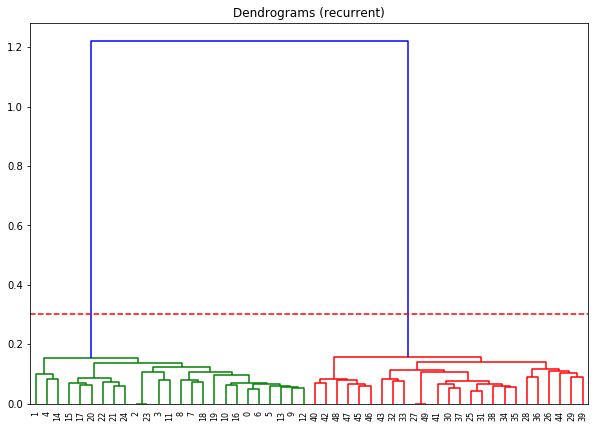

In [88]:
recurrent_scaled = normalize(recurrent)
recurrent_scaled = pd.DataFrame(recurrent_scaled, columns = recurrent.columns) #index = primary.index 

#create dendrogram
#x-axis contains the samples and y-axis represents the distance between these samples

#threshold of 0.3 because that's where we want to cut the dendrogram (number of undisrupted clusters)
#blue line has max vertical distance

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms (recurrent)")  
dend = shc.dendrogram(shc.linkage(recurrent_scaled, method='ward'))
plt.axhline(y=0.3, color='r', linestyle='--')